## How to plot a map using cartopy 

Cartopy is a mapping and imaging package originating from the Met. Office in the UK. The home page for the package is http://scitools.org.uk/cartopy/. Like many python packages, the [documentation](http://scitools.org.uk/cartopy/docs/latest/index.html) is patchy and the best way to learn is to try to do things and ask other people who have figured out this and that. 

We are going to work through a number of the examples and try to extend them to do the kinds of things you might find interesting and useful in the future. The examples are in the form of a [gallery](http://scitools.org.uk/cartopy/docs/latest/gallery.html)

You might also want to look at the [list of map projections](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) from time to time. Not all maps can be plotted in every projection (sometimes because of bugs and sometimes because they are not supposed to work for the data you have) but you can try them and see what happens.

Cartopy is built on top of a lot of the matplotlib graphing tools. It works by introducing a series of projections associated with the axes of a graph. On top of that there is a big toolkit for reading in images, finding data from standard web feeds, and manipulating geographical objects. Many, many libraries are involved and sometimes things break. Luckily the installation that is built for this course is about as reliable as we can ever get. I'm just warning you, though, that it can be quite tough if you want to put this on your laptop from scratch.

---



In [2]:
# First we import the modules we need

import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

# The universal solvent for arrays (and hence images).
import numpy as np



## Read in earthquake data 

I have provided a small dataset of global events (magnitude > 4.5) that we can play with.
It is a dictionary of events year by year with lon, lat, depth, magnitude and month information

In [18]:
eq_events_by_year = np.load('../+Data/events_4.5+by_year_1970-2019.npy').item()

print("Longitude,    Latitude,    Depth,    Magnitude,   Month")
print(eq_events_by_year[2000])
print("Number of events = ", len(eq_events_by_year[2000]))

Longitude,    Latitude,    Depth,    Magnitude,   Month
[[ 7.131000e+01  3.620400e+01  1.378000e+05  4.600000e+00  1.200000e+01]
 [ 1.257450e+02  1.138000e+01  1.000000e+03  4.500000e+00  1.200000e+01]
 [ 1.180949e+02 -9.959900e+00  1.213000e+05  5.000000e+00  1.200000e+01]
 ...
 [ 1.187300e+01  3.843000e+01  5.700000e+03  4.900000e+00  1.000000e+00]
 [ 1.405199e+02 -2.374600e+00  2.000000e+03  4.800000e+00  1.000000e+00]
 [ 2.055200e+01  4.192900e+01  4.600000e+03  4.500000e+00  1.000000e+00]]
Number of events =  6038


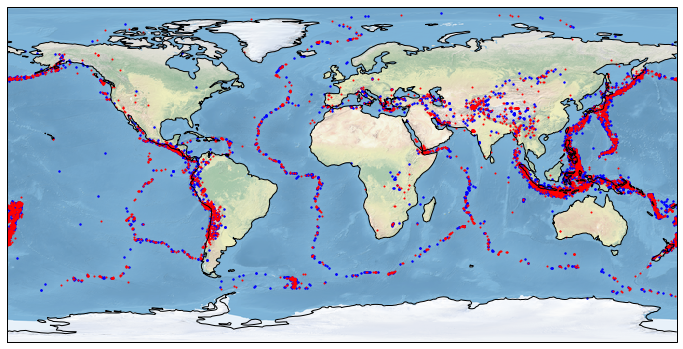

In [39]:
# Year 2000 and year 2001 earthquakes

fig=plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.PlateCarree())

ax.stock_img()
ax.set_global()
ax.coastlines(zorder=3)

eq2000 = eq_events_by_year[2000]
ax.scatter(eq2000[:,0], eq2000[:,1], c="Blue", s=2.0, transform=ccrs.Geodetic())

eq2001 = eq_events_by_year[2001]
ax.scatter(eq2001[:,0], eq2001[:,1], c="Red", s=1.0,  transform=ccrs.Geodetic())



plt.show()
plt.close()

The points can be coloured by one of the other data values, similarly with size of the markers


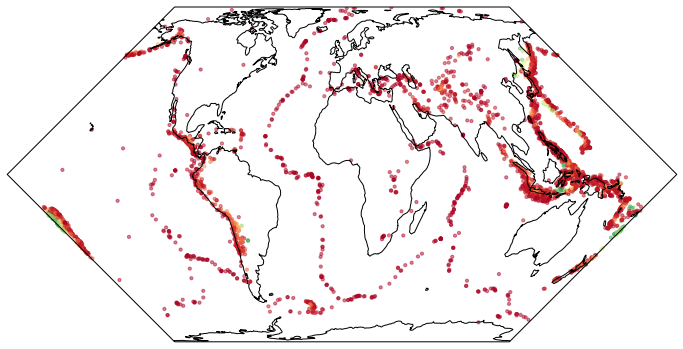

In [51]:
# Year 2000 earthquakes

fig=plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.axes(projection=ccrs.EckertII())

ax.set_global()
# ax.stock_img()
ax.coastlines(zorder=3)

eq2000 = eq_events_by_year[2000]
ax.scatter(eq2000[:,0], eq2000[:,1], c=eq2000[:,2], 
           cmap=matplotlib.cm.RdYlGn, s=10.0, 
           transform=ccrs.Geodetic(),
           alpha=0.5)

plt.show()
plt.close()


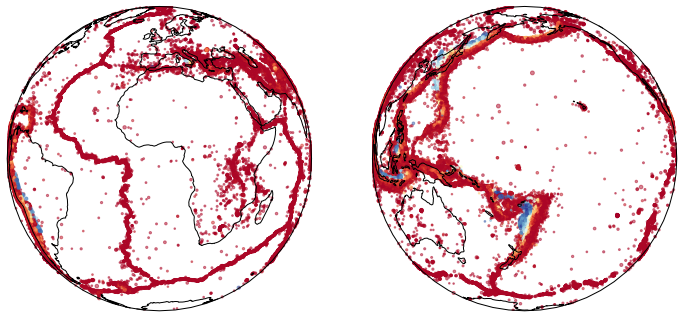

In [50]:
# All earthquakes ... 

fig=plt.figure(figsize=(12, 12), facecolor="none")
ax1 = fig.add_subplot(121, projection=ccrs.Orthographic())
ax2 = fig.add_subplot(122, projection=ccrs.Orthographic(central_longitude=180))


ax1.set_global()
ax2.set_global()
ax1.coastlines(zorder=3)
ax2.coastlines(zorder=3)


for year in eq_events_by_year:
    eqs = eq_events_by_year[year]
    ax1.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2], cmap=matplotlib.cm.RdYlBu, 
               s=(eqs[:,3]-4.0)*5.0, transform=ccrs.Geodetic(), alpha=0.5)
    ax2.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2], cmap=matplotlib.cm.RdYlBu, 
               s=(eqs[:,3]-4.0)*5.0, transform=ccrs.Geodetic(), alpha=0.5)


fig.savefig("Earthquakes_AllYears.png", dpi=150)
plt.show()
plt.close()



In [49]:
!ls

0-How2PlotAMap.ipynb          Exercise1.ipynb
1-How2PlotAnImageOnAMap.ipynb Exercise2.ipynb
2-How2PlotPointsOnAMap.ipynb  TopographyPlusShading.png
Earthquakes_AllYears.png
